In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dim_reduction_utils import DimensionalityReduction, EvaluationMetrics

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Seed for reproducibility
np.random.seed(42)

# %%
# Load the Gisette dataset
def load_gisette_data():
    # Load training data
    X_train = np.loadtxt('Gisette Dataset/GISETTE/gisette_train.data')
    y_train = np.loadtxt('Gisette Dataset/GISETTE/gisette_train.labels')
    
    # Load validation data
    X_val = np.loadtxt('Gisette Dataset/GISETTE/gisette_valid.data')
    y_val = np.loadtxt('Gisette Dataset/gisette_valid.labels')
    
    return X_train, y_train, X_val, y_val

X_train, y_train, X_val, y_val = load_gisette_data()
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# For computational efficiency, we'll use a subset of the training data
# Using 1000 samples from the Gisette dataset
X = X_train[:1000]
y = y_train[:1000].astype(int)

# Convert labels from {-1, 1} to {0, 1} for easier visualization
y = (y + 1) // 2

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")


Training data shape: (6000, 5000)
Validation data shape: (1000, 5000)
Dataset shape: (1000, 5000)
Number of features: 5000
Number of samples: 1000
Number of classes: 2
Class distribution: [511 489]


In [2]:
def plot_density_distribution(X_reduced, y, title):
    plt.figure(figsize=(15, 6))
    
    # First component density
    plt.subplot(1, 2, 1)
    for i, label in enumerate(np.unique(y)):
        sns.kdeplot(X_reduced[y == i, 0], label=f'Class {i}', fill=True, alpha=0.3)
    plt.title(f'{title} - Component 1 Density')
    plt.xlabel('Component 1')
    plt.ylabel('Density')
    plt.legend()
    
    # Second component density (if available)
    if X_reduced.shape[1] > 1:
        plt.subplot(1, 2, 2)
        for i, label in enumerate(np.unique(y)):
            sns.kdeplot(X_reduced[y == i, 1], label=f'Class {i}', fill=True, alpha=0.3)
        plt.title(f'{title} - Component 2 Density')
        plt.xlabel('Component 2')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Initialize dimensionality reduction and evaluation
dr = DimensionalityReduction(n_components=2, random_state=42)
metrics = EvaluationMetrics(k=5)

PCA Metrics:
Trustworthiness: 0.7173
Continuity: 0.8868
KNN Accuracy: 0.6500
Silhouette Score: 0.0828


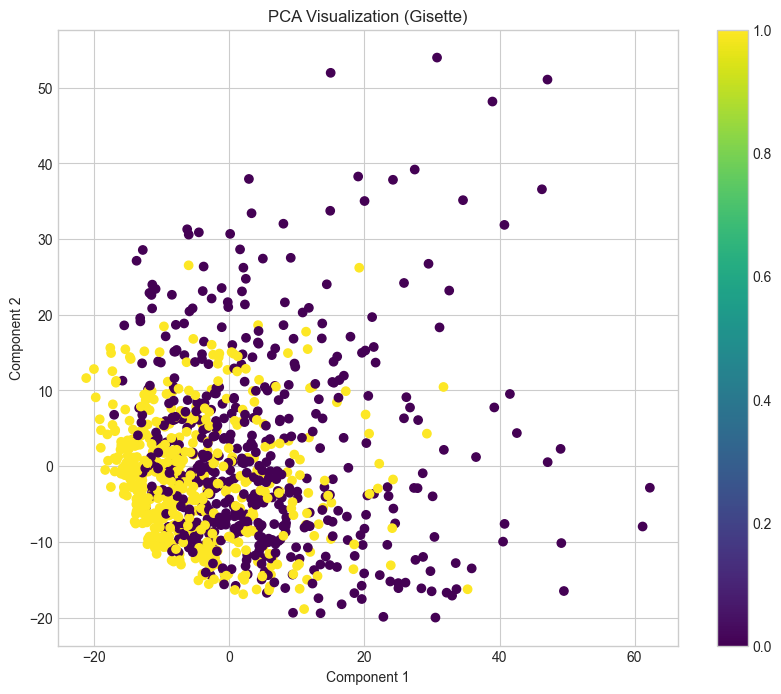

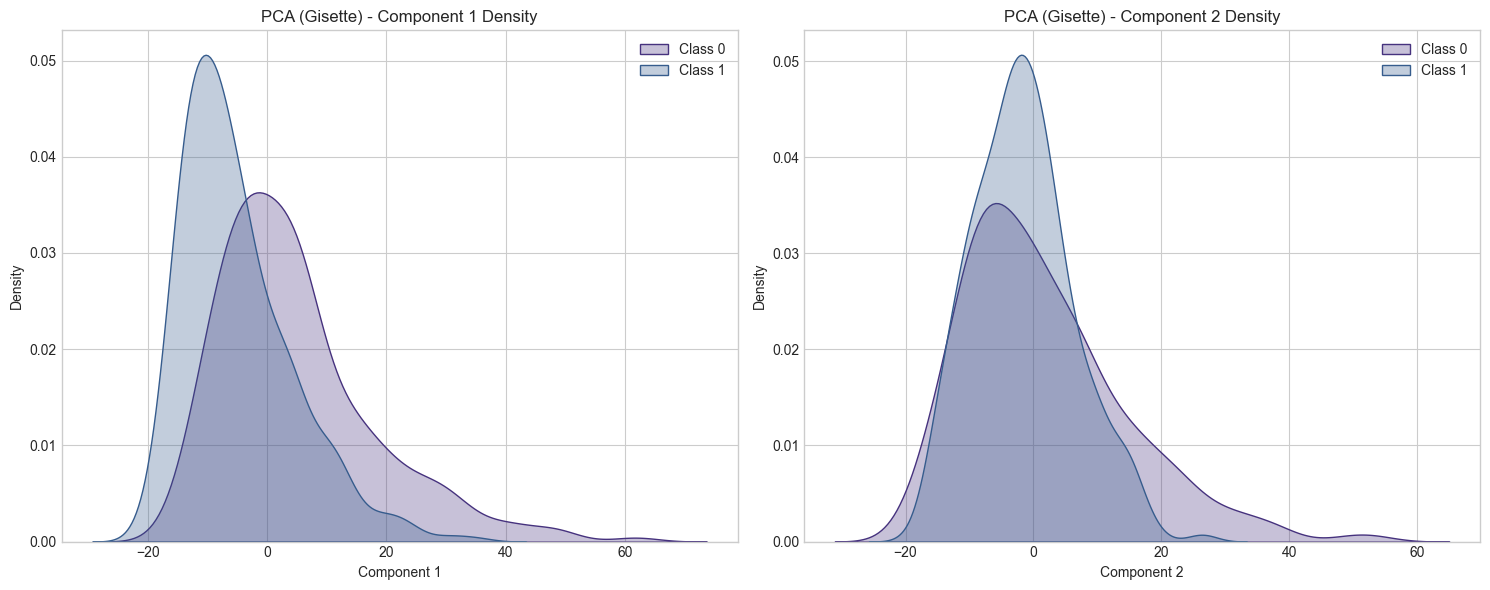

In [3]:
X_pca = dr.pca(X)

# Evaluate PCA
trust_pca = metrics.trustworthiness(X, X_pca)
cont_pca = metrics.continuity(X, X_pca)
knn_acc_pca = metrics.knn_accuracy(X_pca, y)
sil_score_pca = metrics.silhouette_score(X_pca, y)

print(f"PCA Metrics:")
print(f"Trustworthiness: {trust_pca:.4f}")
print(f"Continuity: {cont_pca:.4f}")
print(f"KNN Accuracy: {knn_acc_pca:.4f}")
print(f"Silhouette Score: {sil_score_pca:.4f}")

# Visualize PCA results
metrics.visualize(X_pca, y, title="PCA Visualization (Gisette)")

# Plot density distribution
plot_density_distribution(X_pca, y, "PCA (Gisette)")

LDA Metrics:
Trustworthiness: 0.5692
Continuity: 0.7396
KNN Accuracy: 0.9450
Silhouette Score: 0.6671


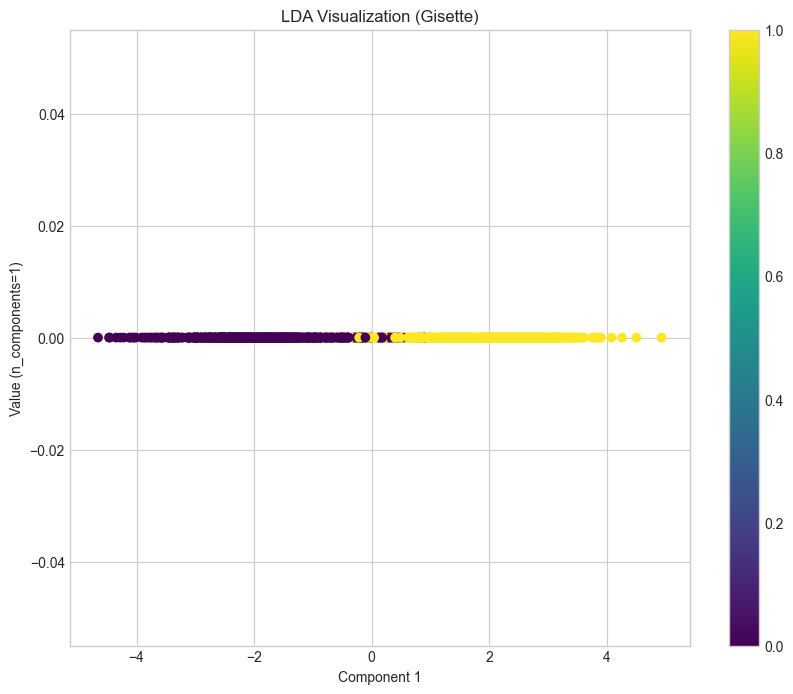

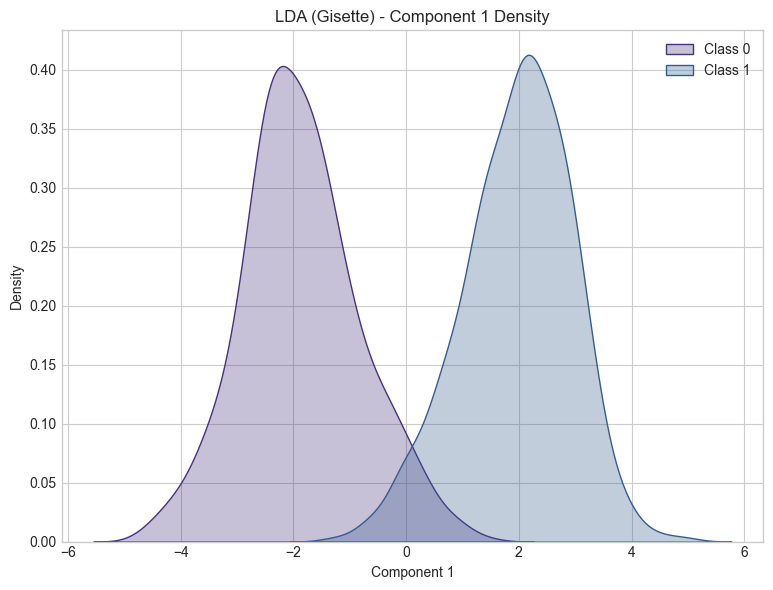

In [4]:
dr_lda = DimensionalityReduction(n_components=1, random_state=42)
X_lda = dr_lda.lda(X, y)

# Evaluate LDA
trust_lda = metrics.trustworthiness(X, X_lda)
cont_lda = metrics.continuity(X, X_lda)
knn_acc_lda = metrics.knn_accuracy(X_lda, y)
sil_score_lda = metrics.silhouette_score(X_lda, y)

print(f"LDA Metrics:")
print(f"Trustworthiness: {trust_lda:.4f}")
print(f"Continuity: {cont_lda:.4f}")
print(f"KNN Accuracy: {knn_acc_lda:.4f}")
print(f"Silhouette Score: {sil_score_lda:.4f}")

# Visualize LDA results
metrics.visualize(X_lda, y, title="LDA Visualization (Gisette)")

# Plot density distribution
plot_density_distribution(X_lda, y, "LDA (Gisette)")

c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib

t-SNE Metrics:
Trustworthiness: 0.9025
Continuity: 0.8859
KNN Accuracy: 0.9300
Silhouette Score: 0.3117


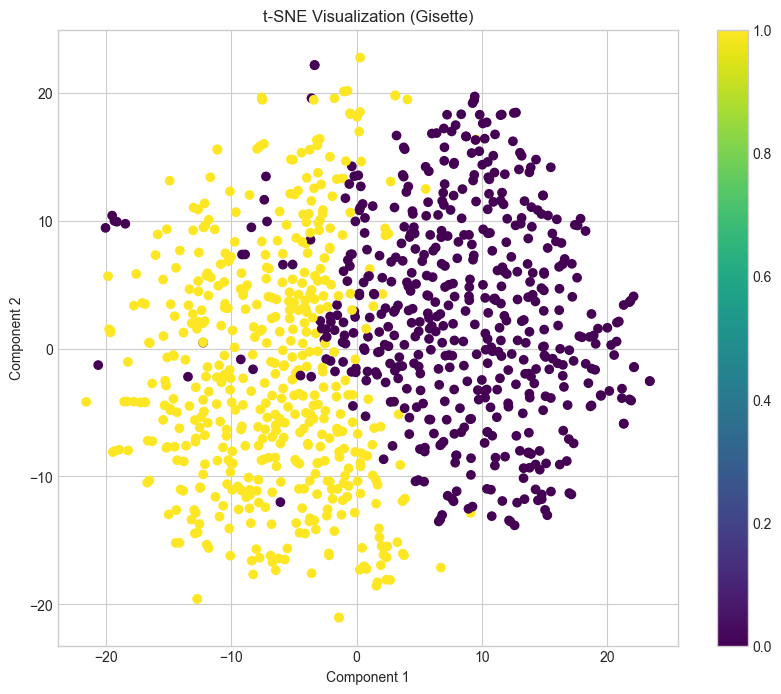

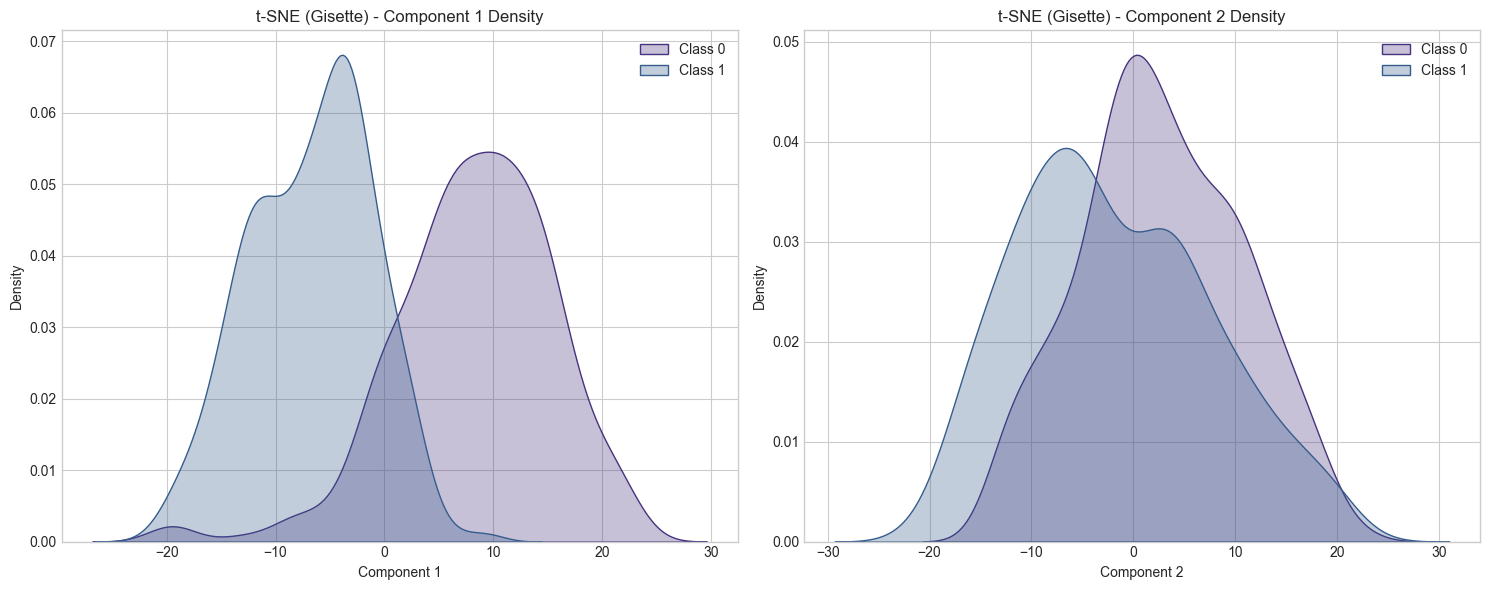

In [5]:
X_tsne = dr.tsne(X, perplexity=30)

# Evaluate t-SNE
trust_tsne = metrics.trustworthiness(X, X_tsne)
cont_tsne = metrics.continuity(X, X_tsne)
knn_acc_tsne = metrics.knn_accuracy(X_tsne, y)
sil_score_tsne = metrics.silhouette_score(X_tsne, y)

print(f"t-SNE Metrics:")
print(f"Trustworthiness: {trust_tsne:.4f}")
print(f"Continuity: {cont_tsne:.4f}")
print(f"KNN Accuracy: {knn_acc_tsne:.4f}")
print(f"Silhouette Score: {sil_score_tsne:.4f}")

# Visualize t-SNE results
metrics.visualize(X_tsne, y, title="t-SNE Visualization (Gisette)")

# Plot density distribution
plot_density_distribution(X_tsne, y, "t-SNE (Gisette)")

MDS Metrics (on 500-sample subset):
Trustworthiness: 0.5878
Continuity: 0.6694
KNN Accuracy: 0.5400
Silhouette Score: -0.0005


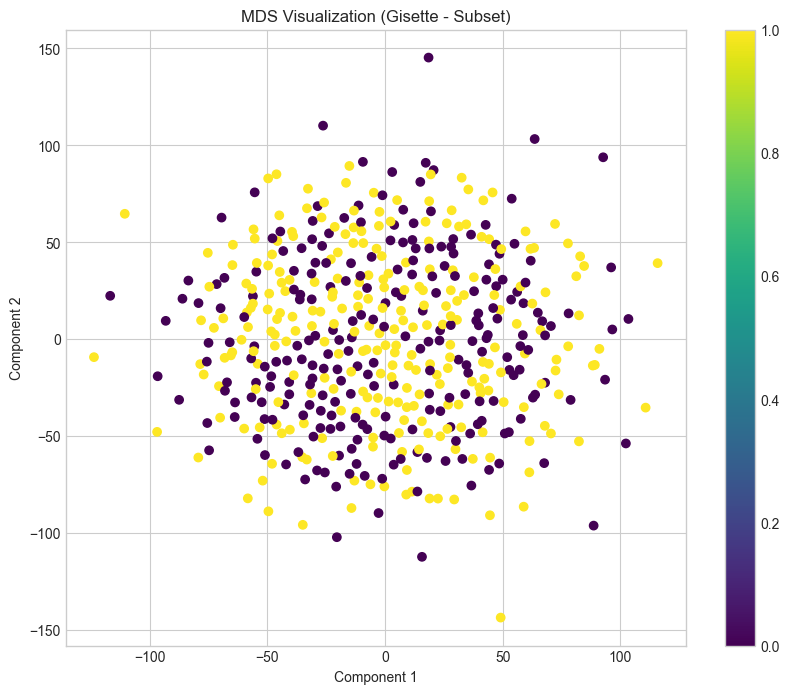

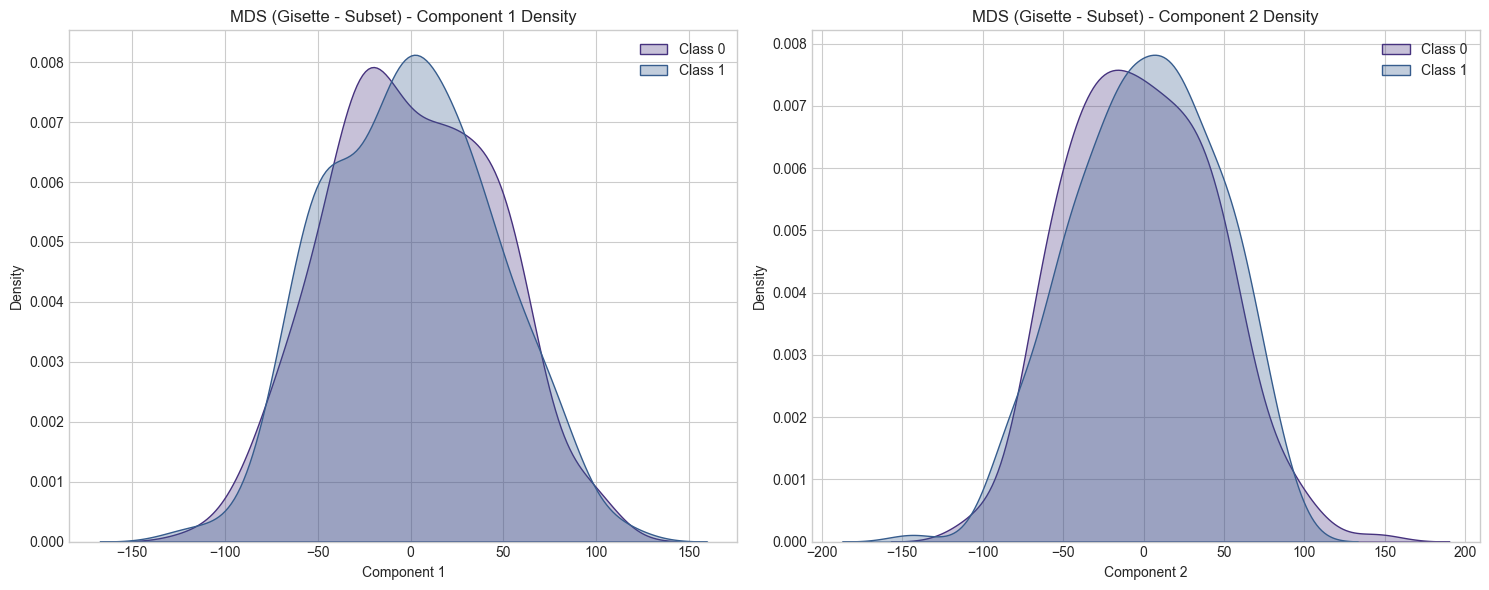

In [10]:
X_mds_subset = X[:500]
y_mds_subset = y[:500]

X_mds = dr.mds(X_mds_subset)

# Evaluate MDS on the subset
trust_mds = metrics.trustworthiness(X_mds_subset, X_mds)
cont_mds = metrics.continuity(X_mds_subset, X_mds)
knn_acc_mds = metrics.knn_accuracy(X_mds, y_mds_subset)
sil_score_mds = metrics.silhouette_score(X_mds, y_mds_subset)

print(f"MDS Metrics (on 500-sample subset):")
print(f"Trustworthiness: {trust_mds:.4f}")
print(f"Continuity: {cont_mds:.4f}")
print(f"KNN Accuracy: {knn_acc_mds:.4f}")
print(f"Silhouette Score: {sil_score_mds:.4f}")

# Visualize MDS results
metrics.visualize(X_mds, y_mds_subset, title="MDS Visualization (Gisette - Subset)")

# Plot density distribution
plot_density_distribution(X_mds, y_mds_subset, "MDS (Gisette - Subset)")

Isomap Metrics (on 500-sample subset):
Trustworthiness: 0.7159
Continuity: 0.8492
KNN Accuracy: 0.8100
Silhouette Score: 0.1949


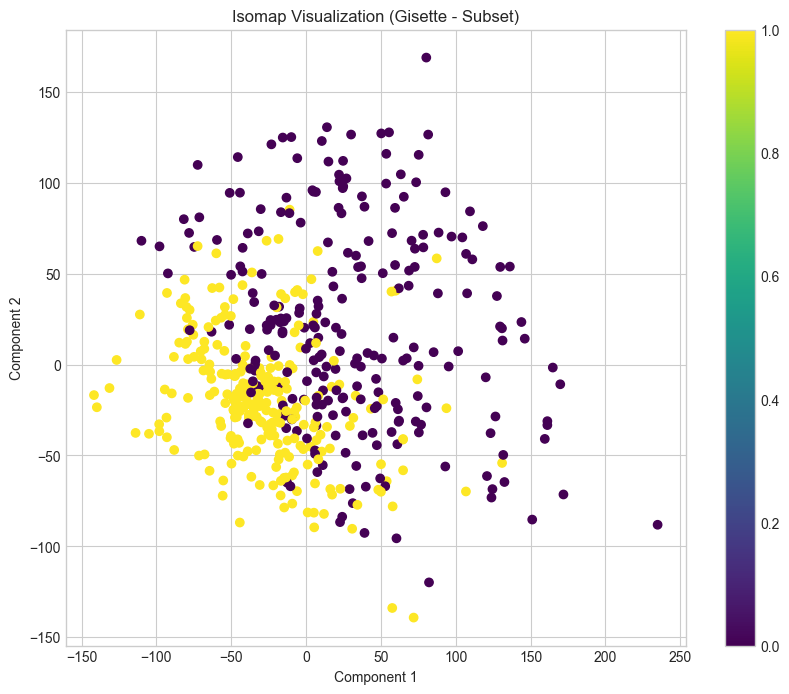

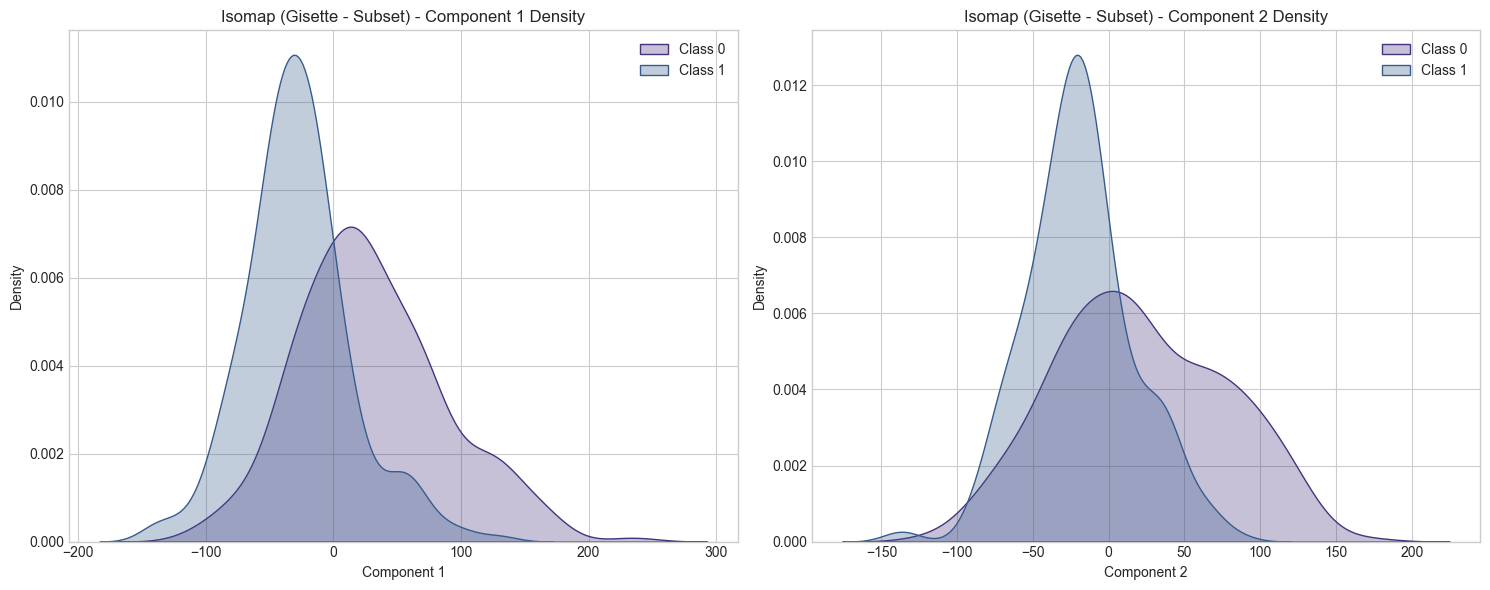

In [11]:
X_isomap_subset = X[:500]
y_isomap_subset = y[:500]

X_isomap = dr.isomap(X_isomap_subset, n_neighbors=10)

# Evaluate Isomap on the subset
trust_isomap = metrics.trustworthiness(X_isomap_subset, X_isomap)
cont_isomap = metrics.continuity(X_isomap_subset, X_isomap)
knn_acc_isomap = metrics.knn_accuracy(X_isomap, y_isomap_subset)
sil_score_isomap = metrics.silhouette_score(X_isomap, y_isomap_subset)

print(f"Isomap Metrics (on 500-sample subset):")
print(f"Trustworthiness: {trust_isomap:.4f}")
print(f"Continuity: {cont_isomap:.4f}")
print(f"KNN Accuracy: {knn_acc_isomap:.4f}")
print(f"Silhouette Score: {sil_score_isomap:.4f}")

# Visualize Isomap results
metrics.visualize(X_isomap, y_isomap_subset, title="Isomap Visualization (Gisette - Subset)")

# Plot density distribution
plot_density_distribution(X_isomap, y_isomap_subset, "Isomap (Gisette - Subset)")

ICA Metrics:
Trustworthiness: 0.7178
Continuity: 0.8873
KNN Accuracy: 0.6350
Silhouette Score: 0.0781


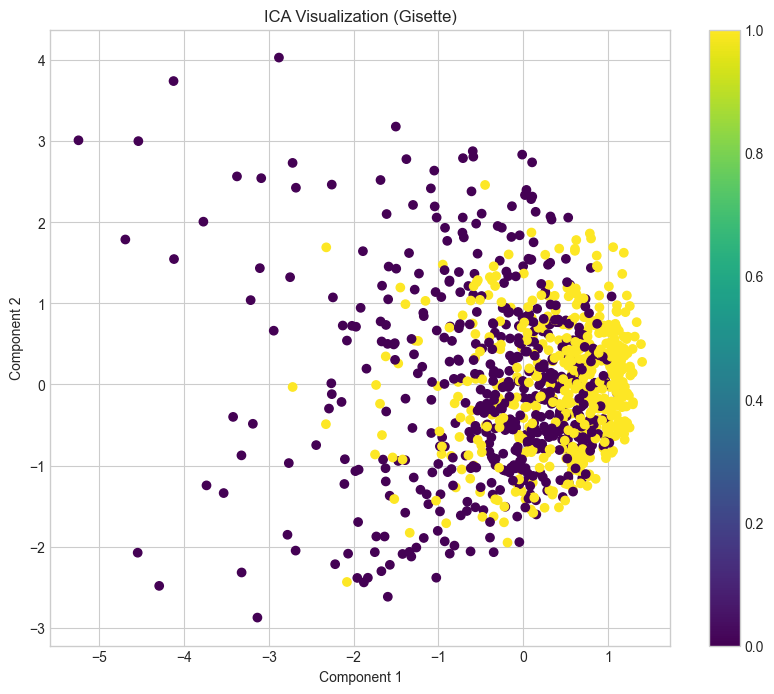

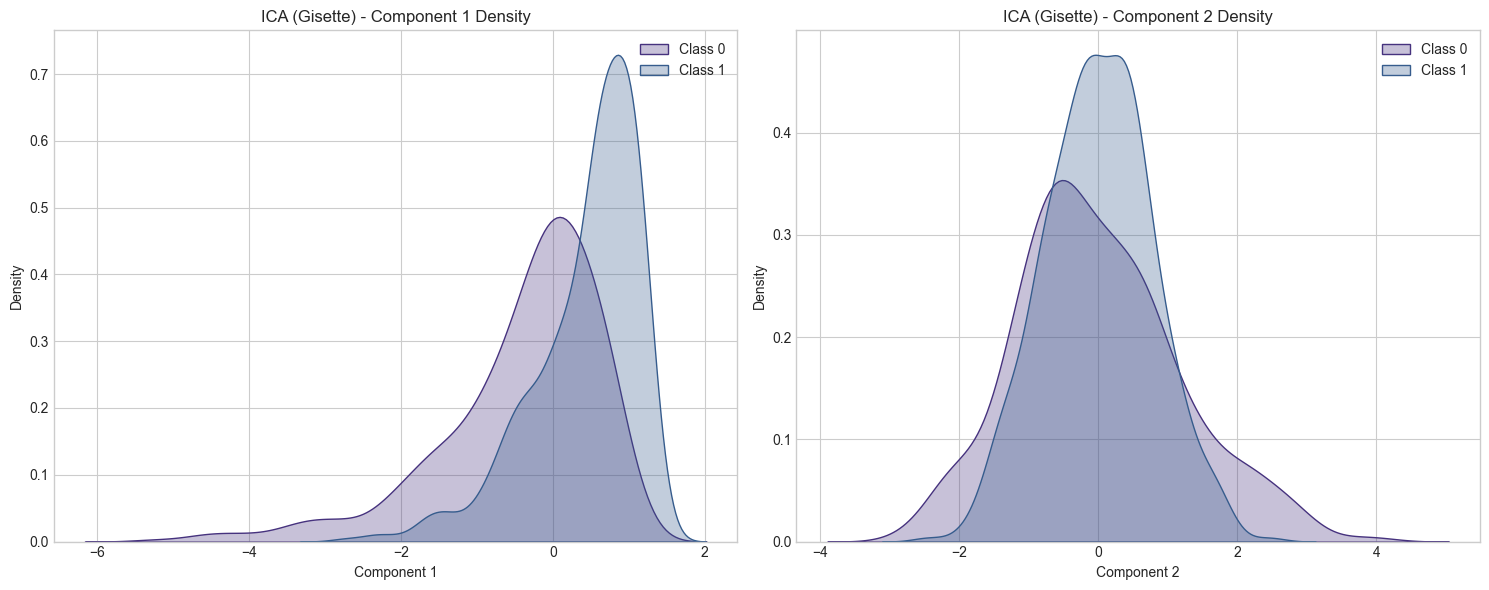

In [12]:
# Apply ICA
X_ica = dr.ica(X)

# Evaluate ICA
trust_ica = metrics.trustworthiness(X, X_ica)
cont_ica = metrics.continuity(X, X_ica)
knn_acc_ica = metrics.knn_accuracy(X_ica, y)
sil_score_ica = metrics.silhouette_score(X_ica, y)

print(f"ICA Metrics:")
print(f"Trustworthiness: {trust_ica:.4f}")
print(f"Continuity: {cont_ica:.4f}")
print(f"KNN Accuracy: {knn_acc_ica:.4f}")
print(f"Silhouette Score: {sil_score_ica:.4f}")

# Visualize ICA results
metrics.visualize(X_ica, y, title="ICA Visualization (Gisette)")

# Plot density distribution
plot_density_distribution(X_ica, y, "ICA (Gisette)")


SOM Metrics:
Trustworthiness: 0.8811
Continuity: 0.7828
KNN Accuracy: 0.8250
Silhouette Score: 0.0535


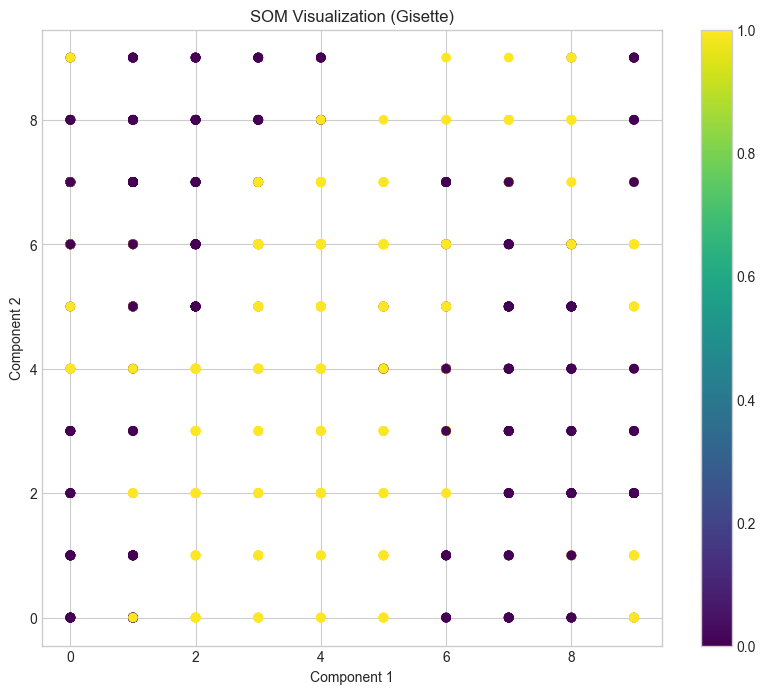

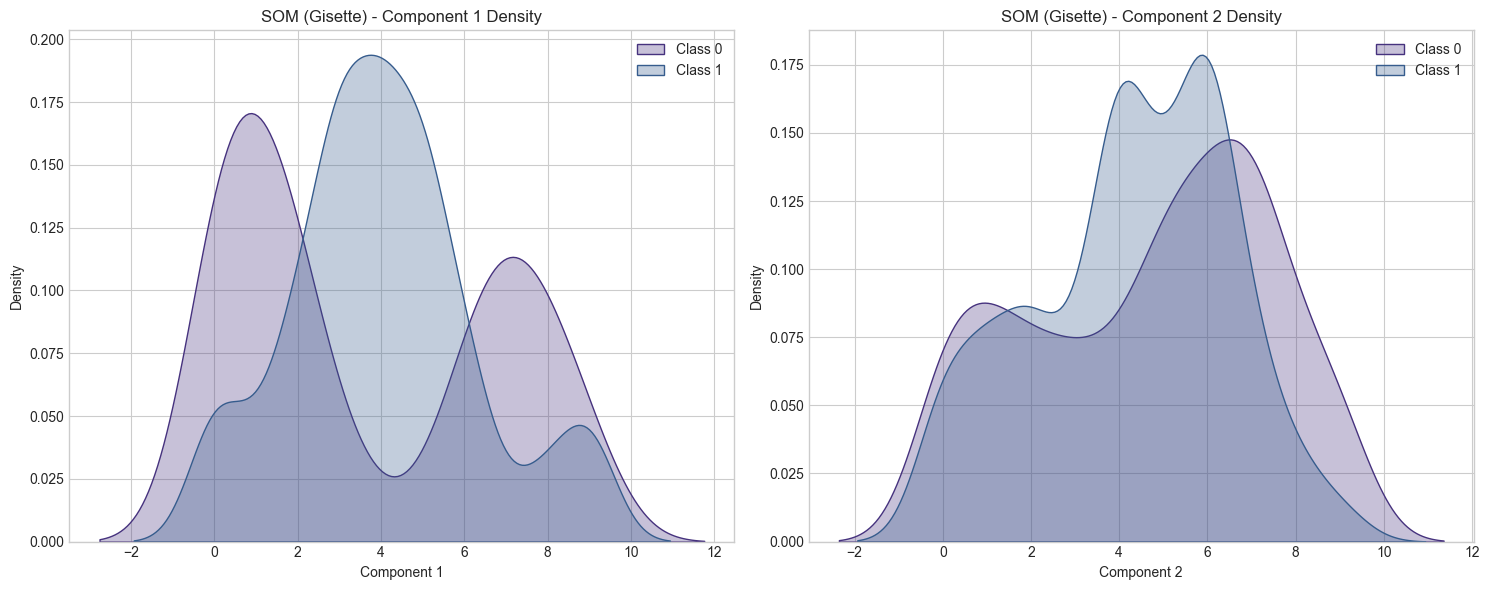

In [13]:
X_som = dr.som(X, grid_size=(10, 10))

# Evaluate SOM
trust_som = metrics.trustworthiness(X, X_som)
cont_som = metrics.continuity(X, X_som)
knn_acc_som = metrics.knn_accuracy(X_som, y)
sil_score_som = metrics.silhouette_score(X_som, y)

print(f"SOM Metrics:")
print(f"Trustworthiness: {trust_som:.4f}")
print(f"Continuity: {cont_som:.4f}")
print(f"KNN Accuracy: {knn_acc_som:.4f}")
print(f"Silhouette Score: {sil_score_som:.4f}")

# Visualize SOM results
metrics.visualize(X_som, y, title="SOM Visualization (Gisette)")

# Plot density distribution
plot_density_distribution(X_som, y, "SOM (Gisette)")


GA-PCA Metrics (on 500-sample subset):
Trustworthiness: 0.7171
Continuity: 0.8750
KNN Accuracy: 0.6900
Silhouette Score: 0.1224


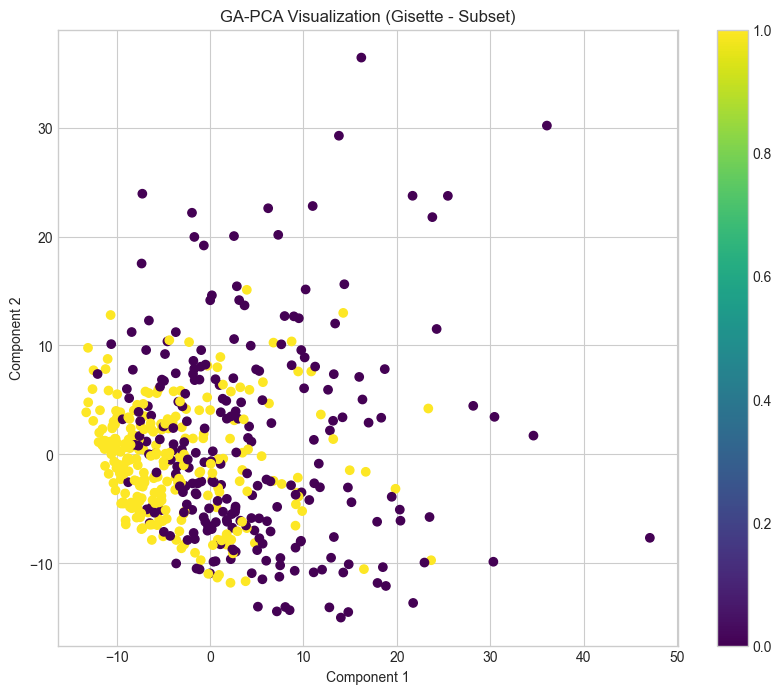

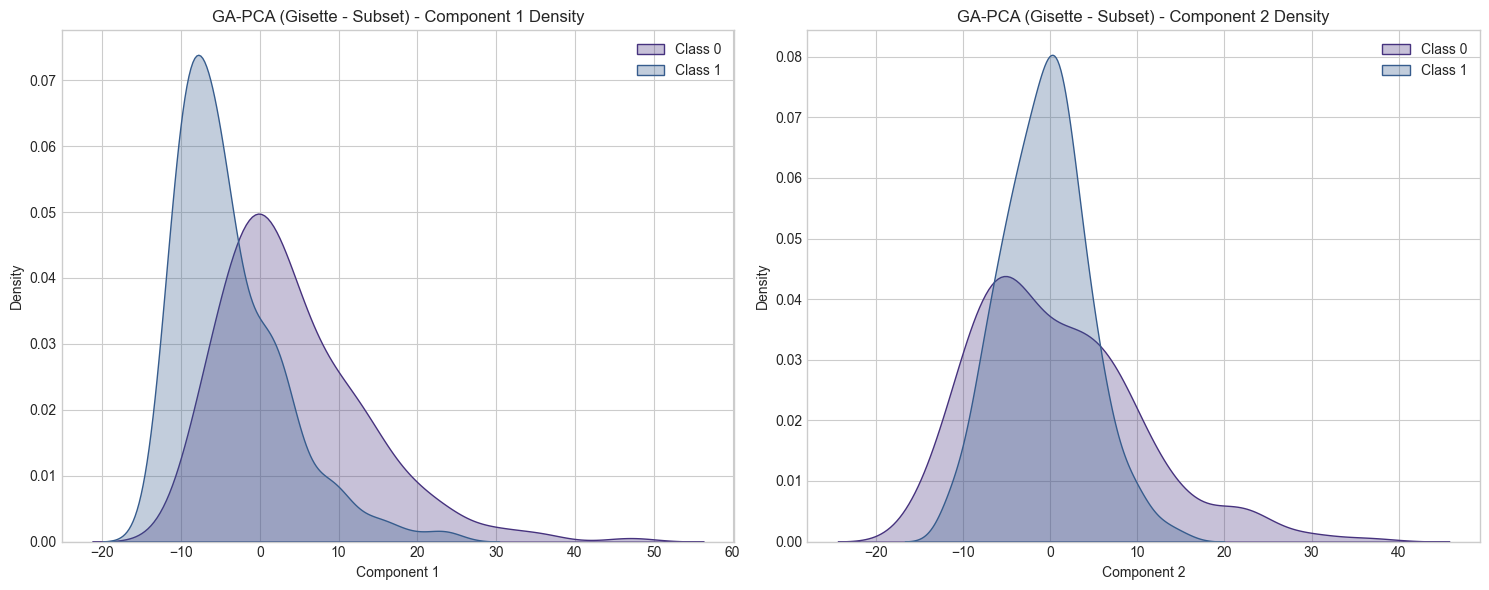

In [14]:
X_ga_subset = X[:500]
y_ga_subset = y[:500]

X_ga_pca = dr.ga_pca(X_ga_subset, y_ga_subset, population_size=15, generations=15, mutation_rate=0.1)

# Evaluate GA-PCA on the subset
trust_ga_pca = metrics.trustworthiness(X_ga_subset, X_ga_pca)
cont_ga_pca = metrics.continuity(X_ga_subset, X_ga_pca)
knn_acc_ga_pca = metrics.knn_accuracy(X_ga_pca, y_ga_subset)
sil_score_ga_pca = metrics.silhouette_score(X_ga_pca, y_ga_subset)

print(f"GA-PCA Metrics (on 500-sample subset):")
print(f"Trustworthiness: {trust_ga_pca:.4f}")
print(f"Continuity: {cont_ga_pca:.4f}")
print(f"KNN Accuracy: {knn_acc_ga_pca:.4f}")
print(f"Silhouette Score: {sil_score_ga_pca:.4f}")

# Visualize GA-PCA results
metrics.visualize(X_ga_pca, y_ga_subset, title="GA-PCA Visualization (Gisette - Subset)")

# Plot density distribution
plot_density_distribution(X_ga_pca, y_ga_subset, "GA-PCA (Gisette - Subset)")

ACO Metrics (on 500-sample subset):
Trustworthiness: 0.7257
Continuity: 0.8757
KNN Accuracy: 0.7300
Silhouette Score: 0.1146


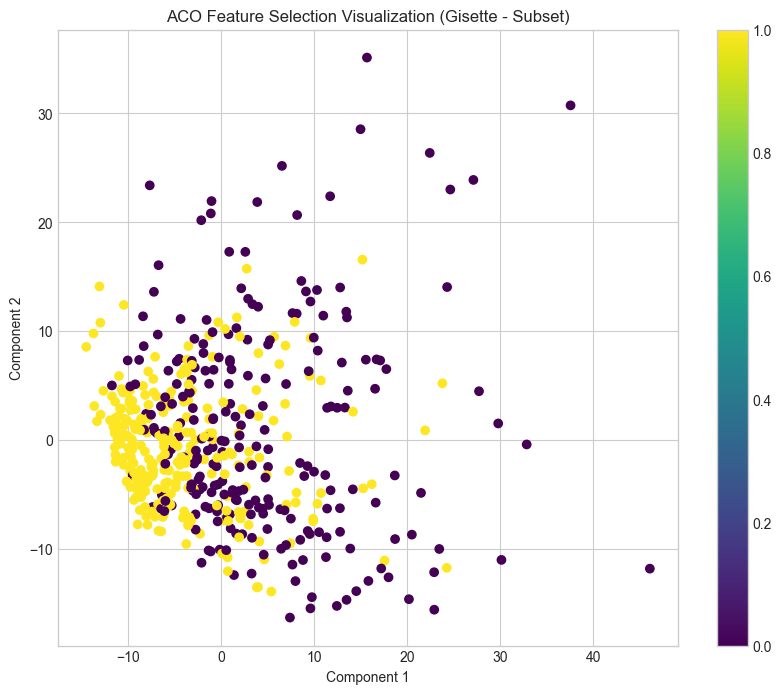

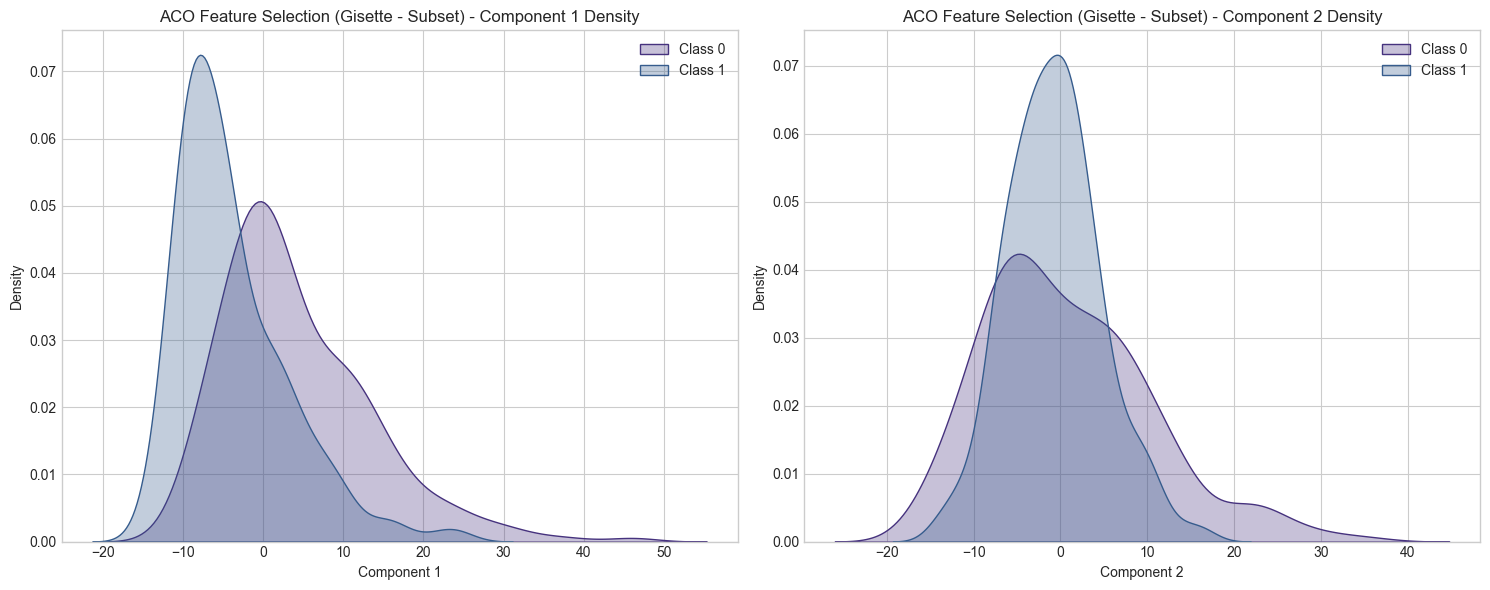

In [20]:
X_aco_subset = X[:500]
y_aco_subset = y[:500]

X_aco = dr.aco_feature_selection(X_aco_subset, y_aco_subset, n_ants=15, n_iterations=15, alpha=1, beta=2, rho=0.1)

# Evaluate ACO on the subset
trust_aco = metrics.trustworthiness(X_aco_subset, X_aco)
cont_aco = metrics.continuity(X_aco_subset, X_aco)
knn_acc_aco = metrics.knn_accuracy(X_aco, y_aco_subset)
sil_score_aco = metrics.silhouette_score(X_aco, y_aco_subset)

print(f"ACO Metrics (on 500-sample subset):")
print(f"Trustworthiness: {trust_aco:.4f}")
print(f"Continuity: {cont_aco:.4f}")
print(f"KNN Accuracy: {knn_acc_aco:.4f}")
print(f"Silhouette Score: {sil_score_aco:.4f}")

# Visualize ACO results
metrics.visualize(X_aco, y_aco_subset, title="ACO Feature Selection Visualization (Gisette - Subset)")

# Plot density distribution
plot_density_distribution(X_aco, y_aco_subset, "ACO Feature Selection (Gisette - Subset)")


ABC Metrics (on 500-sample subset):
Trustworthiness: 0.5475
Continuity: 0.5911
KNN Accuracy: 0.6300
Silhouette Score: 0.0237


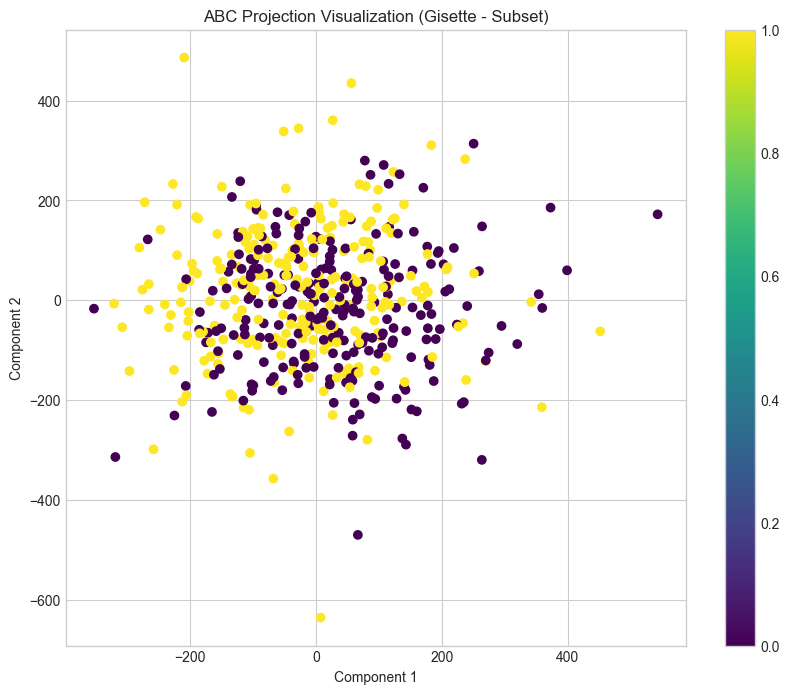

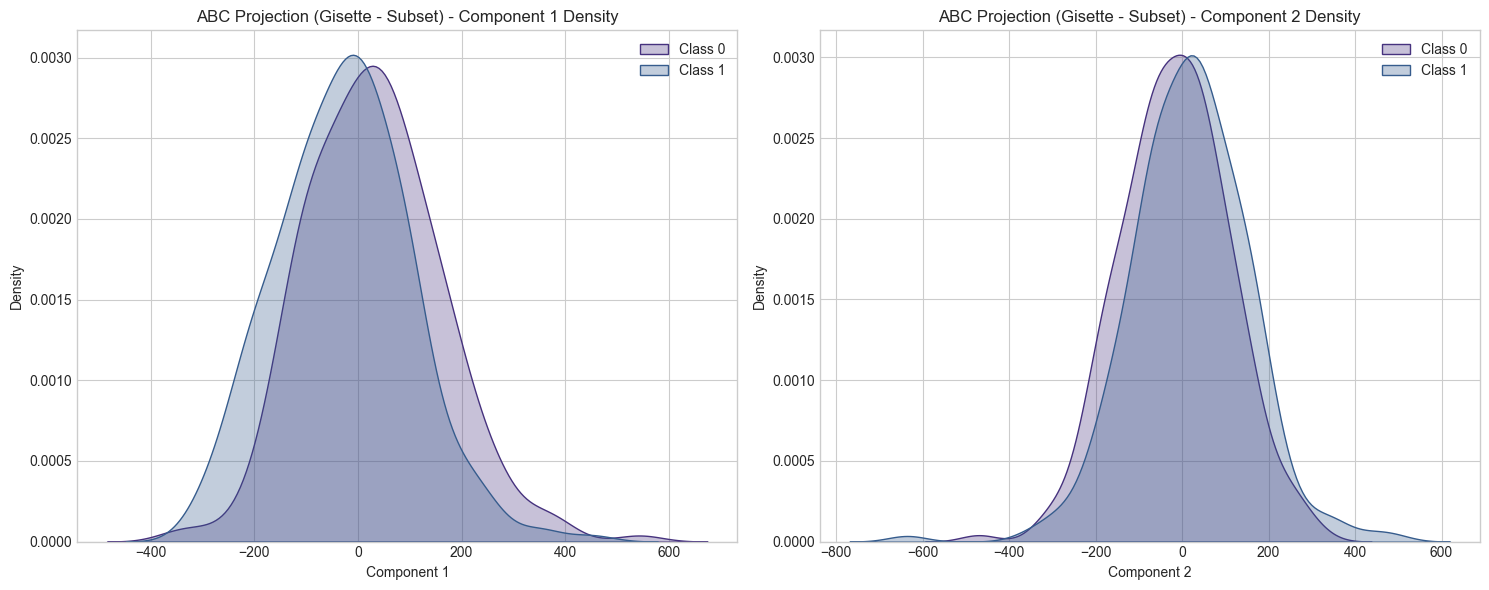

In [19]:
X_abc_subset = X[:500]
y_abc_subset = y[:500]

X_abc = dr.abc_projection(X_abc_subset, y_abc_subset, n_bees=15, n_iterations=15, limit=3)

# Evaluate ABC on the subset
trust_abc = metrics.trustworthiness(X_abc_subset, X_abc)
cont_abc = metrics.continuity(X_abc_subset, X_abc)
knn_acc_abc = metrics.knn_accuracy(X_abc, y_abc_subset)
sil_score_abc = metrics.silhouette_score(X_abc, y_abc_subset)

print(f"ABC Metrics (on 500-sample subset):")
print(f"Trustworthiness: {trust_abc:.4f}")
print(f"Continuity: {cont_abc:.4f}")
print(f"KNN Accuracy: {knn_acc_abc:.4f}")
print(f"Silhouette Score: {sil_score_abc:.4f}")

# Visualize ABC results
metrics.visualize(X_abc, y_abc_subset, title="ABC Projection Visualization (Gisette - Subset)")

# Plot density distribution
plot_density_distribution(X_abc, y_abc_subset, "ABC Projection (Gisette - Subset)")

PSO Metrics (on 500-sample subset):
Trustworthiness: 0.5402
Continuity: 0.5820
KNN Accuracy: 0.6800
Silhouette Score: 0.0314


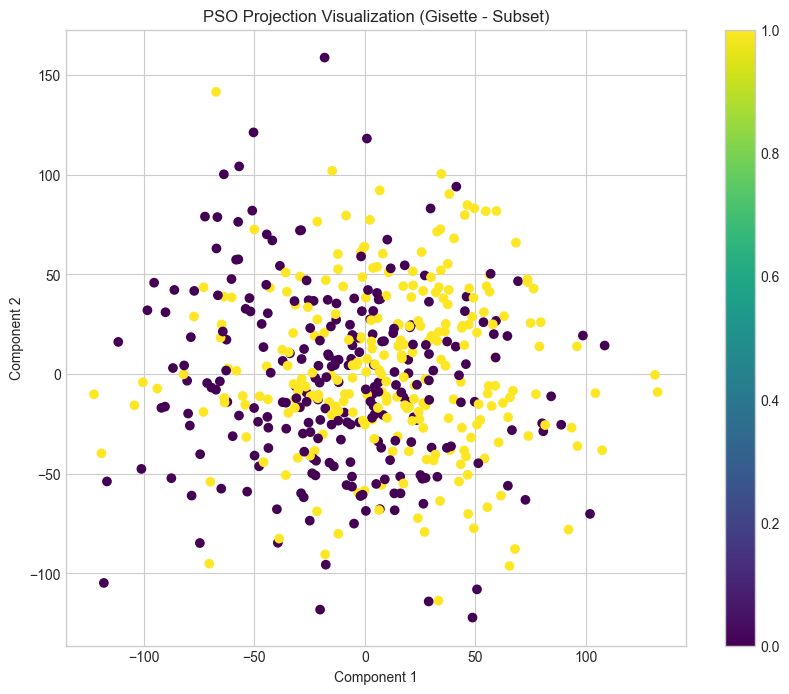

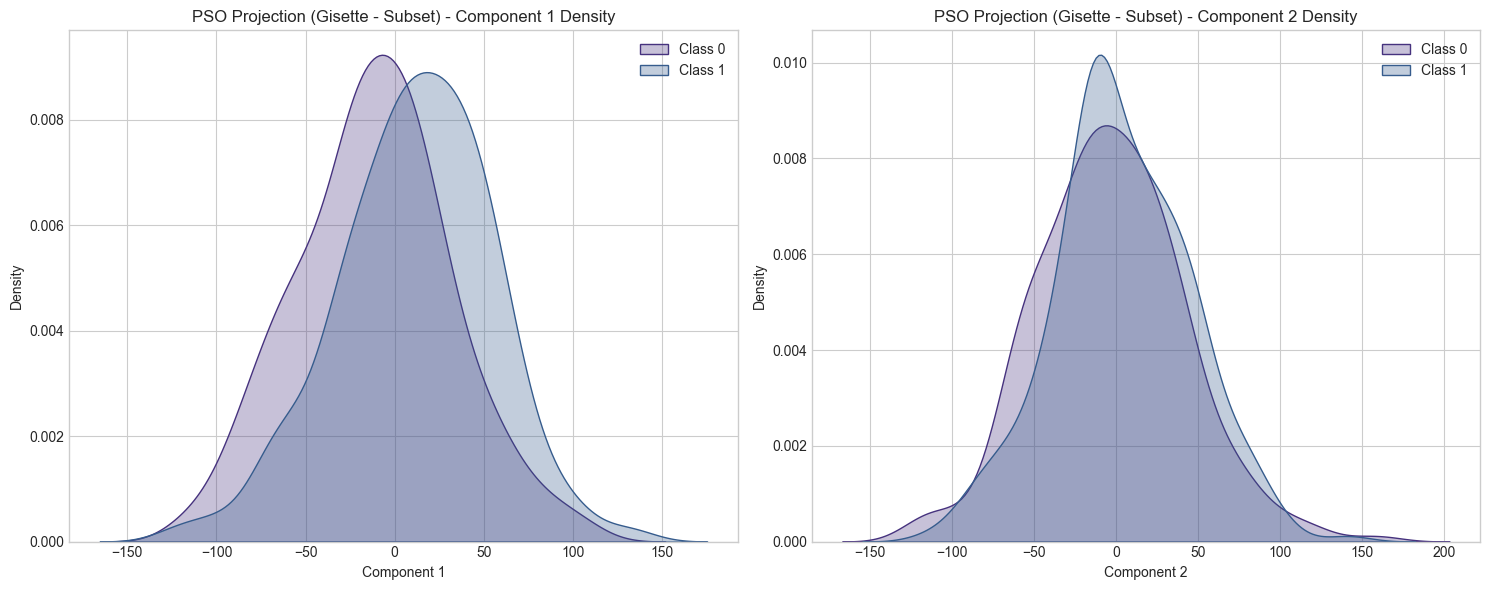

In [17]:
X_pso_subset = X[:500]
y_pso_subset = y[:500]

X_pso = dr.pso_projection(X_pso_subset, y_pso_subset, n_particles=15, n_iterations=15, w=0.7, c1=1.5, c2=1.5)

# Evaluate PSO on the subset
trust_pso = metrics.trustworthiness(X_pso_subset, X_pso)
cont_pso = metrics.continuity(X_pso_subset, X_pso)
knn_acc_pso = metrics.knn_accuracy(X_pso, y_pso_subset)
sil_score_pso = metrics.silhouette_score(X_pso, y_pso_subset)

print(f"PSO Metrics (on 500-sample subset):")
print(f"Trustworthiness: {trust_pso:.4f}")
print(f"Continuity: {cont_pso:.4f}")
print(f"KNN Accuracy: {knn_acc_pso:.4f}")
print(f"Silhouette Score: {sil_score_pso:.4f}")

# Visualize PSO results
metrics.visualize(X_pso, y_pso_subset, title="PSO Projection Visualization (Gisette - Subset)")

# Plot density distribution
plot_density_distribution(X_pso, y_pso_subset, "PSO Projection (Gisette - Subset)")

In [21]:
techniques = ['PCA', 'LDA', 't-SNE', 'MDS*', 'Isomap*', 'ICA', 'SOM', 'GA-PCA*', 'ABC*', 'ACO*', 'PSO*']
trustworthiness = [trust_pca, trust_lda, trust_tsne, trust_mds, trust_isomap, trust_ica, 
                  trust_som, trust_ga_pca, trust_abc, trust_aco, trust_pso]
continuity = [cont_pca, cont_lda, cont_tsne, cont_mds, cont_isomap, cont_ica, 
             cont_som, cont_ga_pca, cont_abc, cont_aco, cont_pso]
knn_accuracy = [knn_acc_pca, knn_acc_lda, knn_acc_tsne, knn_acc_mds, knn_acc_isomap, knn_acc_ica, 
               knn_acc_som, knn_acc_ga_pca, knn_acc_abc, knn_acc_aco, knn_acc_pso]
silhouette = [sil_score_pca, sil_score_lda, sil_score_tsne, sil_score_mds, sil_score_isomap, sil_score_ica, 
             sil_score_som, sil_score_ga_pca, sil_score_abc, sil_score_aco, sil_score_pso]

# Create a DataFrame
results_df = pd.DataFrame({
    'Technique': techniques,
    'Trustworthiness': trustworthiness,
    'Continuity': continuity,
    'KNN Accuracy': knn_accuracy,
    'Silhouette Score': silhouette
})

# Display the results
print("Note: Techniques marked with * were applied on a reduced subset of 500 samples due to computational constraints.")
results_df

Note: Techniques marked with * were applied on a reduced subset of 500 samples due to computational constraints.


,Technique,Trustworthiness,Continuity,KNN Accuracy,Silhouette Score
0,PCA,0.717288,0.886769,0.650,0.082802
1,LDA,0.569164,0.739635,0.945,0.667079
2,t-SNE,0.902490,0.885918,0.930,0.311743
3,MDS*,0.587824,0.669357,0.540,-0.000542
4,Isomap*,0.715938,0.849189,0.810,0.194867
5,ICA,0.717772,0.887266,0.635,0.078085
6,SOM,0.881111,0.782762,0.825,0.053522
7,GA-PCA*,0.717143,0.875042,0.690,0.122368
8,ABC*,0.547517,0.591089,0.630,0.023737
9,ACO*,0.725669,0.875694,0.730,0.114617


C:\Users\LapTop\AppData\Local\Temp\ipykernel_30608\2114869448.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_30608\2114869448.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_30608\2114869448.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_30608\2114869448.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

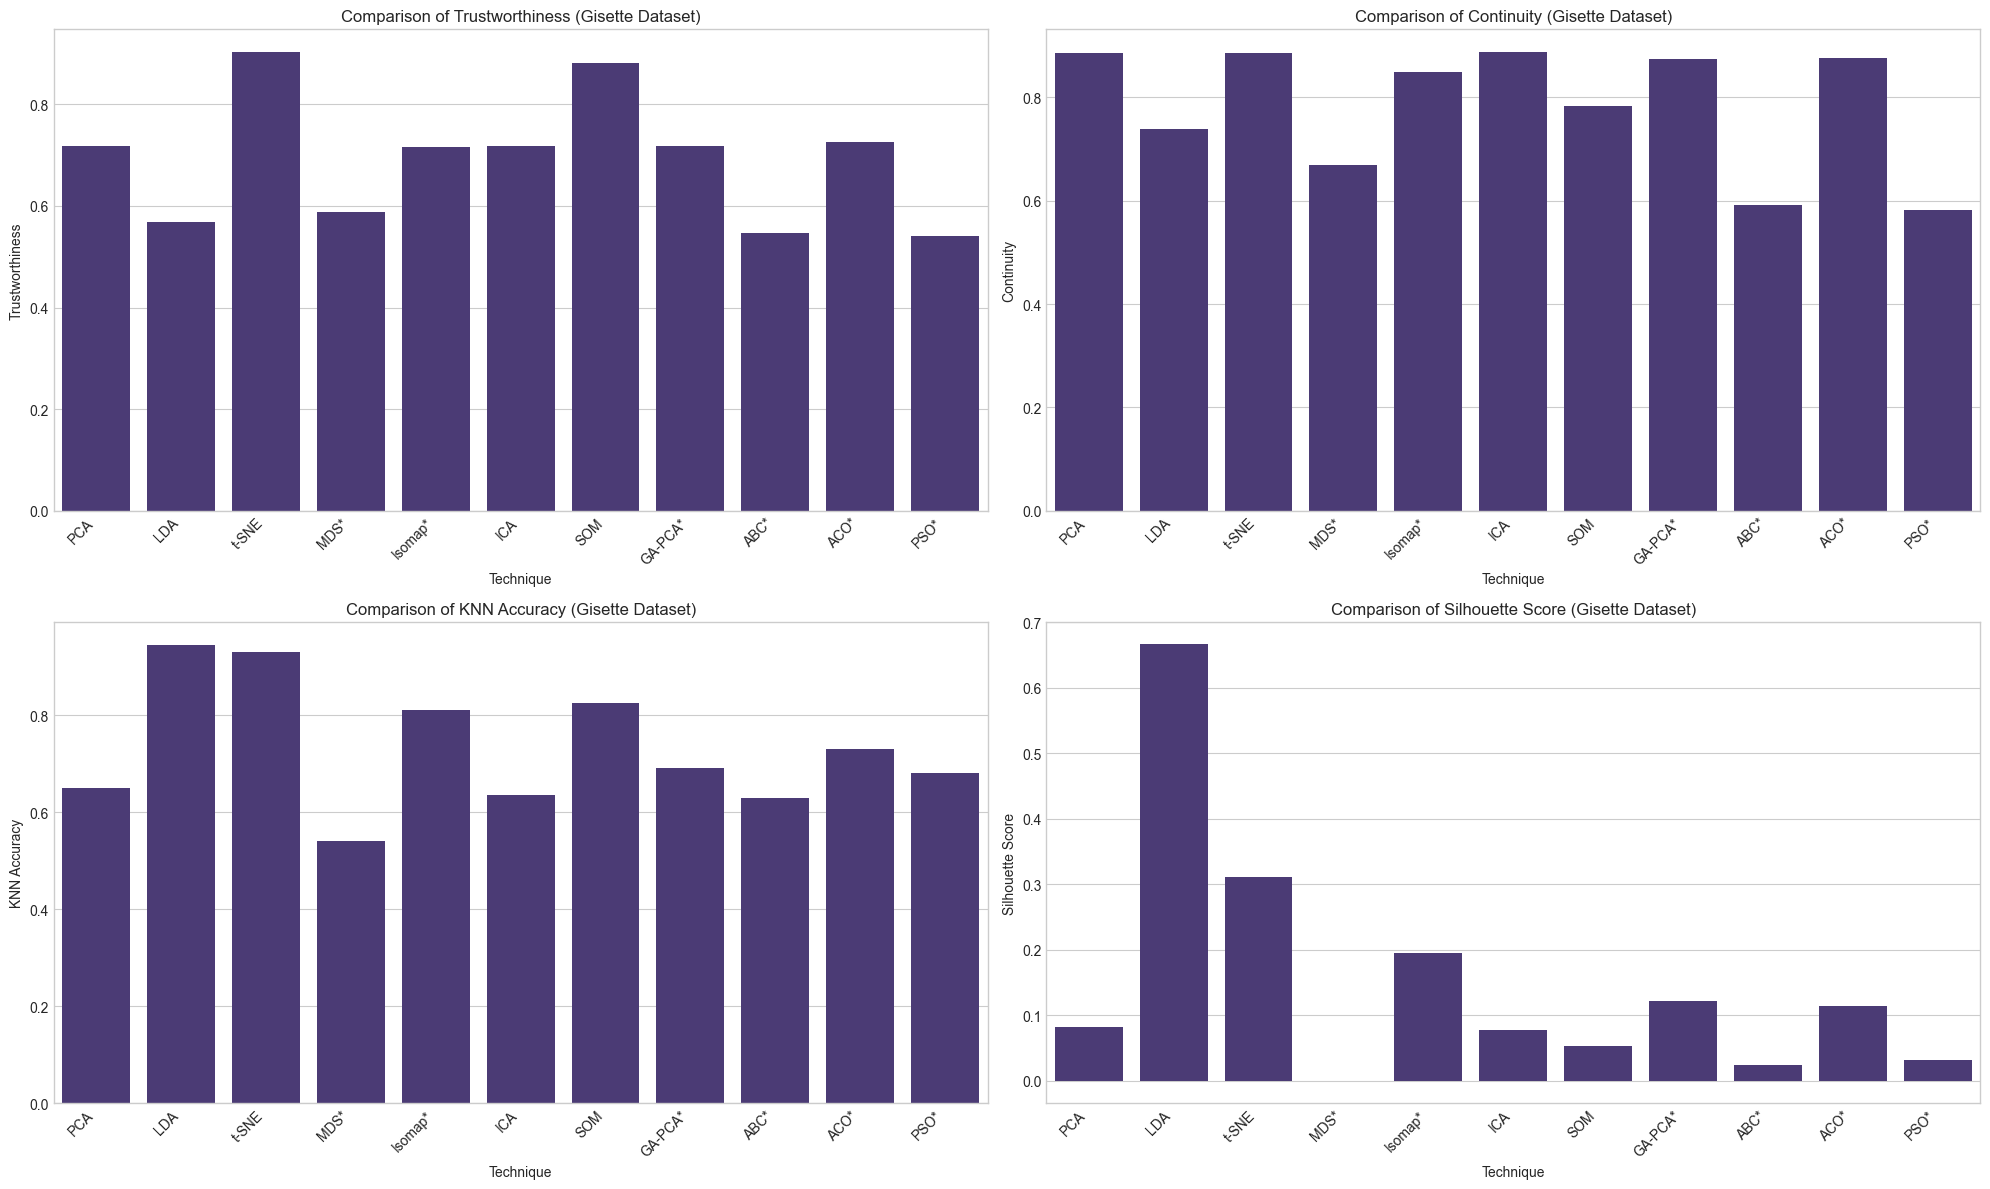

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
metrics_to_plot = ['Trustworthiness', 'Continuity', 'KNN Accuracy', 'Silhouette Score']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    sns.barplot(x='Technique', y=metric, data=results_df, ax=ax)
    ax.set_title(f'Comparison of {metric} (Gisette Dataset)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()